In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum
from typing import Any, List

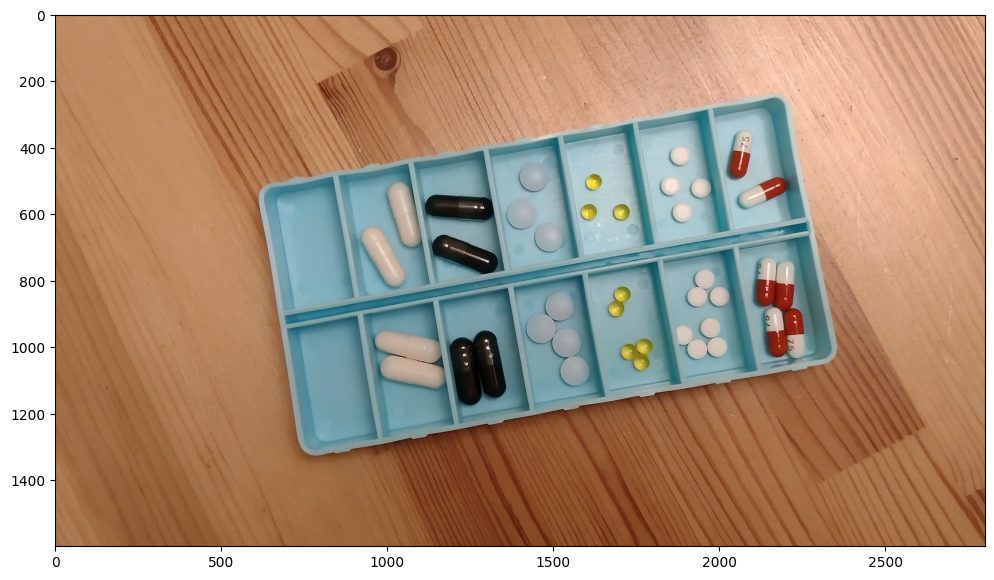

In [2]:
calib = cv2.imread('Lab5_dane/calib.png')[..., ::-1]
plt.subplots(1, 1, figsize=(12,8))[1].imshow(calib);

In [3]:
class PillType(Enum):
    PROBIO = 1    # duże białe kapsułki
    CARBON = 2    # duże czarne kapsułki
    KETO = 3      # niebieskie tabletki
    ESPU = 4      # małe żółte kapsułki
    BIOX = 5      # małe białe tabletki
    LINE = 6      # czerwono-białe kapsułki (klasa trudna - realizacja opcjonalna)

In [4]:
class Pill:
    """Output of object detection, represents a single instance"""
    def __init__(self, pill_type: PillType, location: Any):
        self.type = pill_type
        self.location = location

## Probio

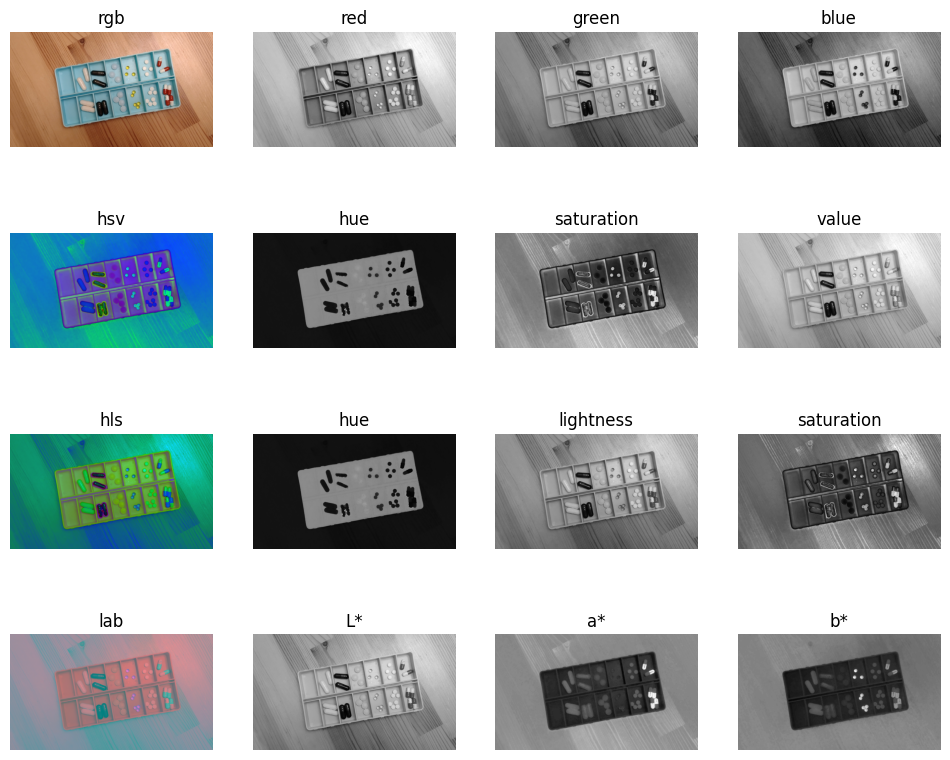

In [5]:
# Plot different color models
rgb = calib.copy()
hsv = cv2.cvtColor(calib, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(calib, cv2.COLOR_RGB2HLS)
lab = cv2.cvtColor(calib, cv2.COLOR_RGB2LAB)

rgb_dict = {'rgb': rgb, 'red': rgb[..., 0], 'green': rgb[..., 1], 'blue': rgb[..., 2]}
hsv_dict = {'hsv': hsv, 'hue': hsv[..., 0], 'saturation': hsv[..., 1], 'value': hsv[..., 2]}
hls_dict = {'hls': hls, 'hue': hls[..., 0], 'lightness': hls[..., 1], 'saturation': hls[..., 2]}
lab_dict = {'lab': lab, 'L*': lab[..., 0], 'a*': lab[..., 1], 'b*': lab[..., 2]}
dicts = [rgb_dict, hsv_dict, hls_dict, lab_dict]

_, axs = plt.subplots(4, 4, figsize = (12, 10))
for i, dict in enumerate(dicts):
    for j, (k, v) in enumerate(dict.items()):
        axs[i][j].imshow(v, cmap = 'gray')
        axs[i][j].set_title(k)
        axs[i][j].axis('off')
plt.show()

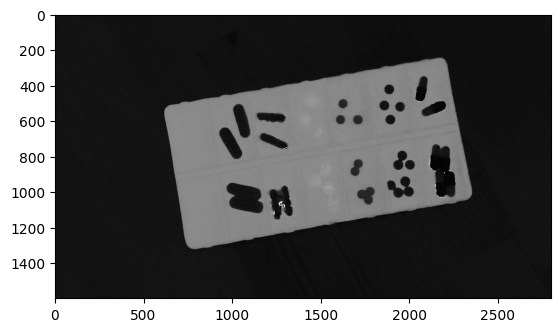

In [6]:
hue = cv2.cvtColor(calib, cv2.COLOR_RGB2HSV)[..., 0]
plt.imshow(hue, cmap = 'gray')

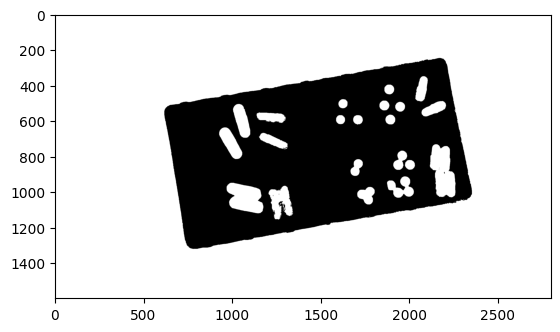

In [42]:
_, binary = cv2.threshold(hue, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap = 'gray')

In [ ]:
num_labels, labels = cv2.connectedComponents(binary, connectivity = 4)
sizes = np.bincount(labels.ravel())
sizes

array([1158181, 3154783,    6897,    2434,       1,       5,    2108,
             1,    2464,    7011,    2398,   11635,    7052,    2429,
          2072,    2260,   11950,    7010,       1,       2,   30060,
          4996,    4163,    2404,       1,       1,       1,       1,
             1,   10128,   25715,   15261,    6440,       1,       8,
            44,       1,       8,       5,       2,       2,       1,
             1,       2,       3,       5,       1,       2,       4,
             3,       1,       1,       2,       6,       2,       2,
             5,       4,       1,       1,       2,       1,       1,
            12])

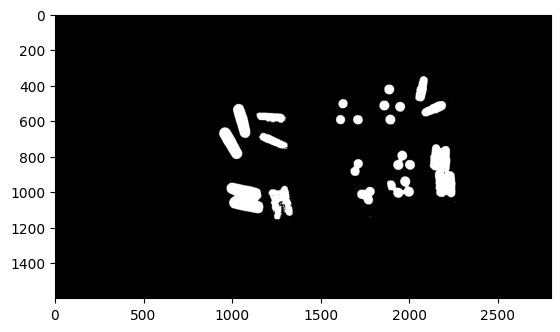

In [48]:
background_id = np.argmax(sizes)
binary2 = binary.copy()
binary2[labels == background_id] = 0

plt.imshow(binary2, cmap = 'gray')

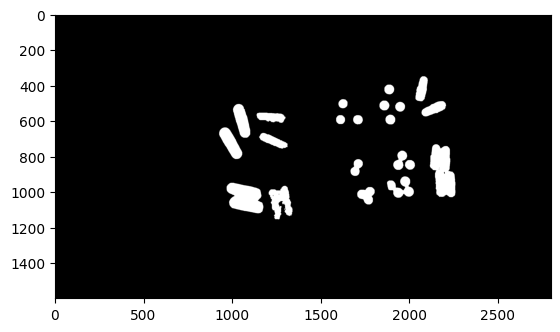

In [50]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(binary2, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)

plt.imshow(bin_img, cmap = 'gray')

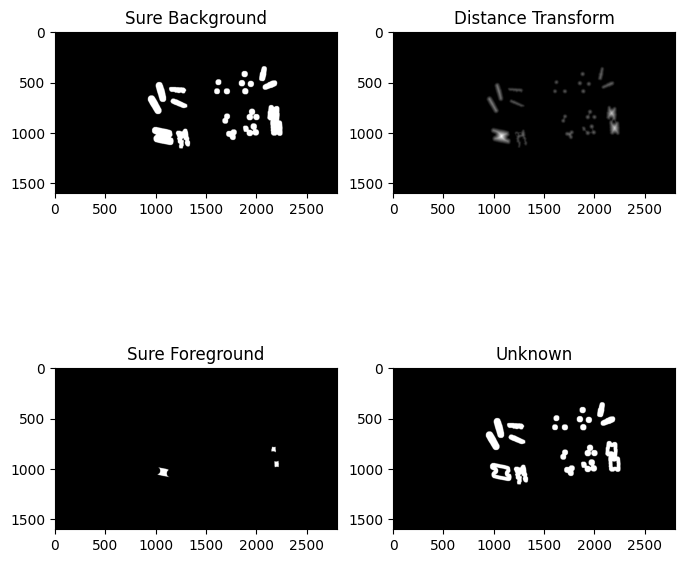

In [60]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
axes[0, 0].imshow(sure_bg, cmap = 'gray')
axes[0, 0].set_title('Sure Background')
 
# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
axes[0,1].imshow(dist, cmap = 'gray')
axes[0, 1].set_title('Distance Transform')
 
#foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
axes[1, 0].imshow(sure_fg, cmap = 'gray')
axes[1, 0].set_title('Sure Foreground')
 
# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
axes[1, 1].imshow(unknown, cmap = 'gray')
axes[1, 1].set_title('Unknown')
 
plt.show()